In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [3]:
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [4]:
data = {}
for f in files:
    data[f]=[]

In [5]:
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

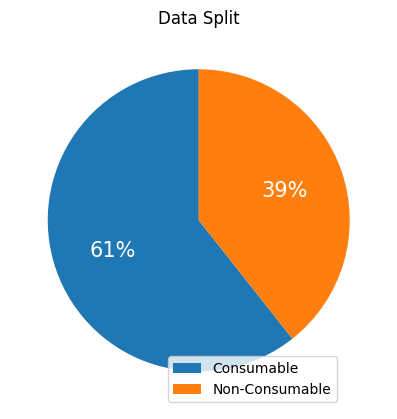

In [7]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [8]:
width = 100
height = 100
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
#         if counter == sample_size:
#             break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class Non-Consumable
Calculate Time 31.29415


In [9]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(310, 100, 100, 3)

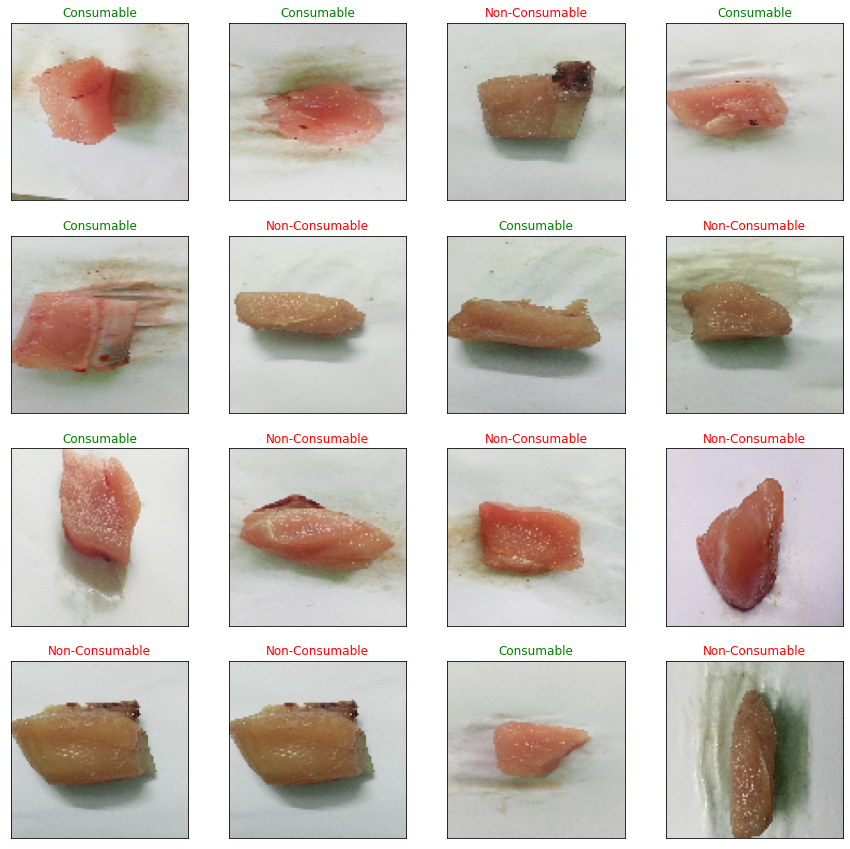

In [11]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
#     elif image_target[fig]=='Intermediate':
#         c='yellow'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

2022-11-03 23:55:34.599465: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [15]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
7/7 [==============================] - 3s 314ms/step - loss: 1.0034 - accuracy: 0.5899 - val_loss: 0.6797 - val_accuracy: 0.6022
Epoch 2/10
7/7 [==============================] - 2s 269ms/step - loss: 0.7168 - accuracy: 0.4977 - val_loss: 0.6825 - val_accuracy: 0.6022
Epoch 3/10
7/7 [==============================] - 2s 265ms/step - loss: 0.6737 - accuracy: 0.6083 - val_loss: 0.6734 - val_accuracy: 0.6022
Epoch 4/10
7/7 [==============================] - 2s 271ms/step - loss: 0.6624 - accuracy: 0.6083 - val_loss: 0.6662 - val_accuracy: 0.6022
Epoch 5/10
7/7 [==============================] - 2s 273ms/step - loss: 0.6597 - accuracy: 0.6175 - val_loss: 0.6650 - val_accuracy: 0.6022
Epoch 6/10
7/7 [==============================] - 2s 273ms/step - loss: 0.6414 - accuracy: 0.6359 - val_loss: 0.6290 - val_accuracy: 0.6129
Epoch 7/10
7/7 [==============================] - 2s 269ms/step - loss: 0.6026 - accuracy: 0.6728 - val_loss: 0.6237 - val_accuracy: 0.7527
Epoch 8/10
7/7 [====

3/3 - 0s - loss: 0.4718 - accuracy: 0.7634 - 220ms/epoch - 73ms/step


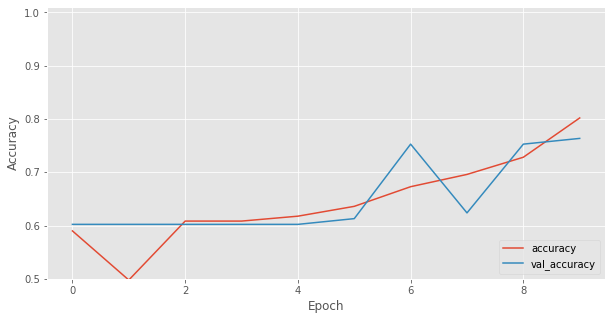

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [20]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 57ms/step - loss: 0.4718 - accuracy: 0.7634


In [21]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.4717879295349121
accuracy : 0.7634408473968506


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 35)        980       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 35)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        20224     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)             0

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

3/3 [==============================] - 0s 63ms/step


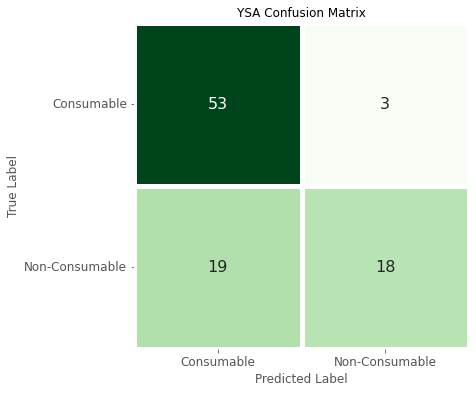

In [24]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [21]:
def Prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 37ms/step


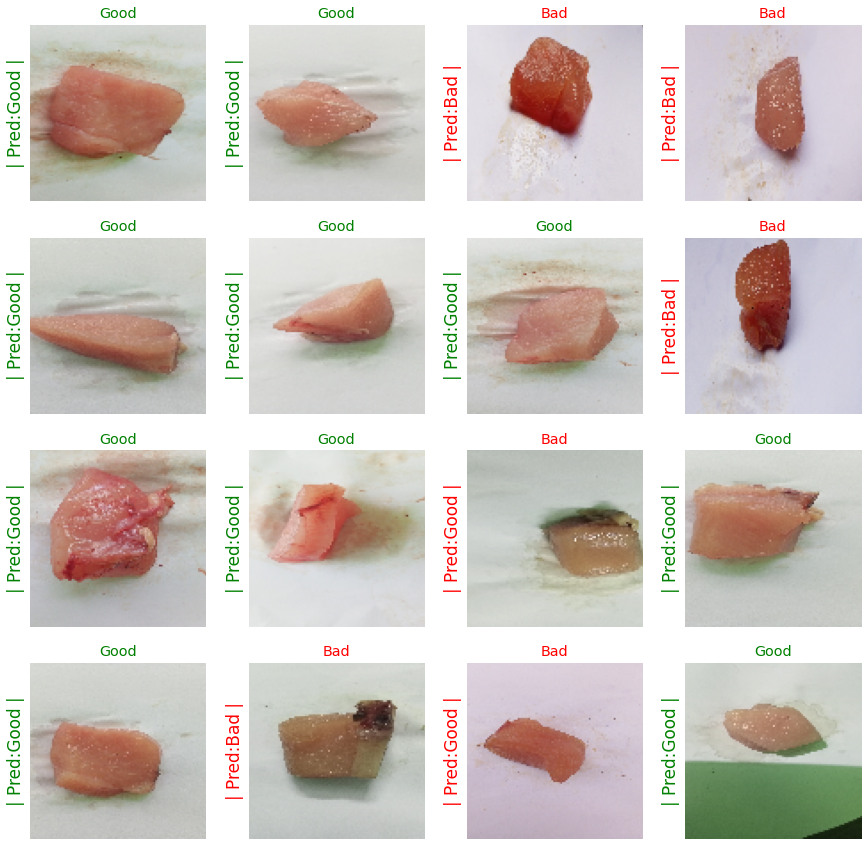

In [22]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Good':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()